In [1]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
# Loading the training and test datasets using pandas

train_df = pd.read_csv("tblTrain.csv")
test_df = pd.read_csv("tblTest.csv")

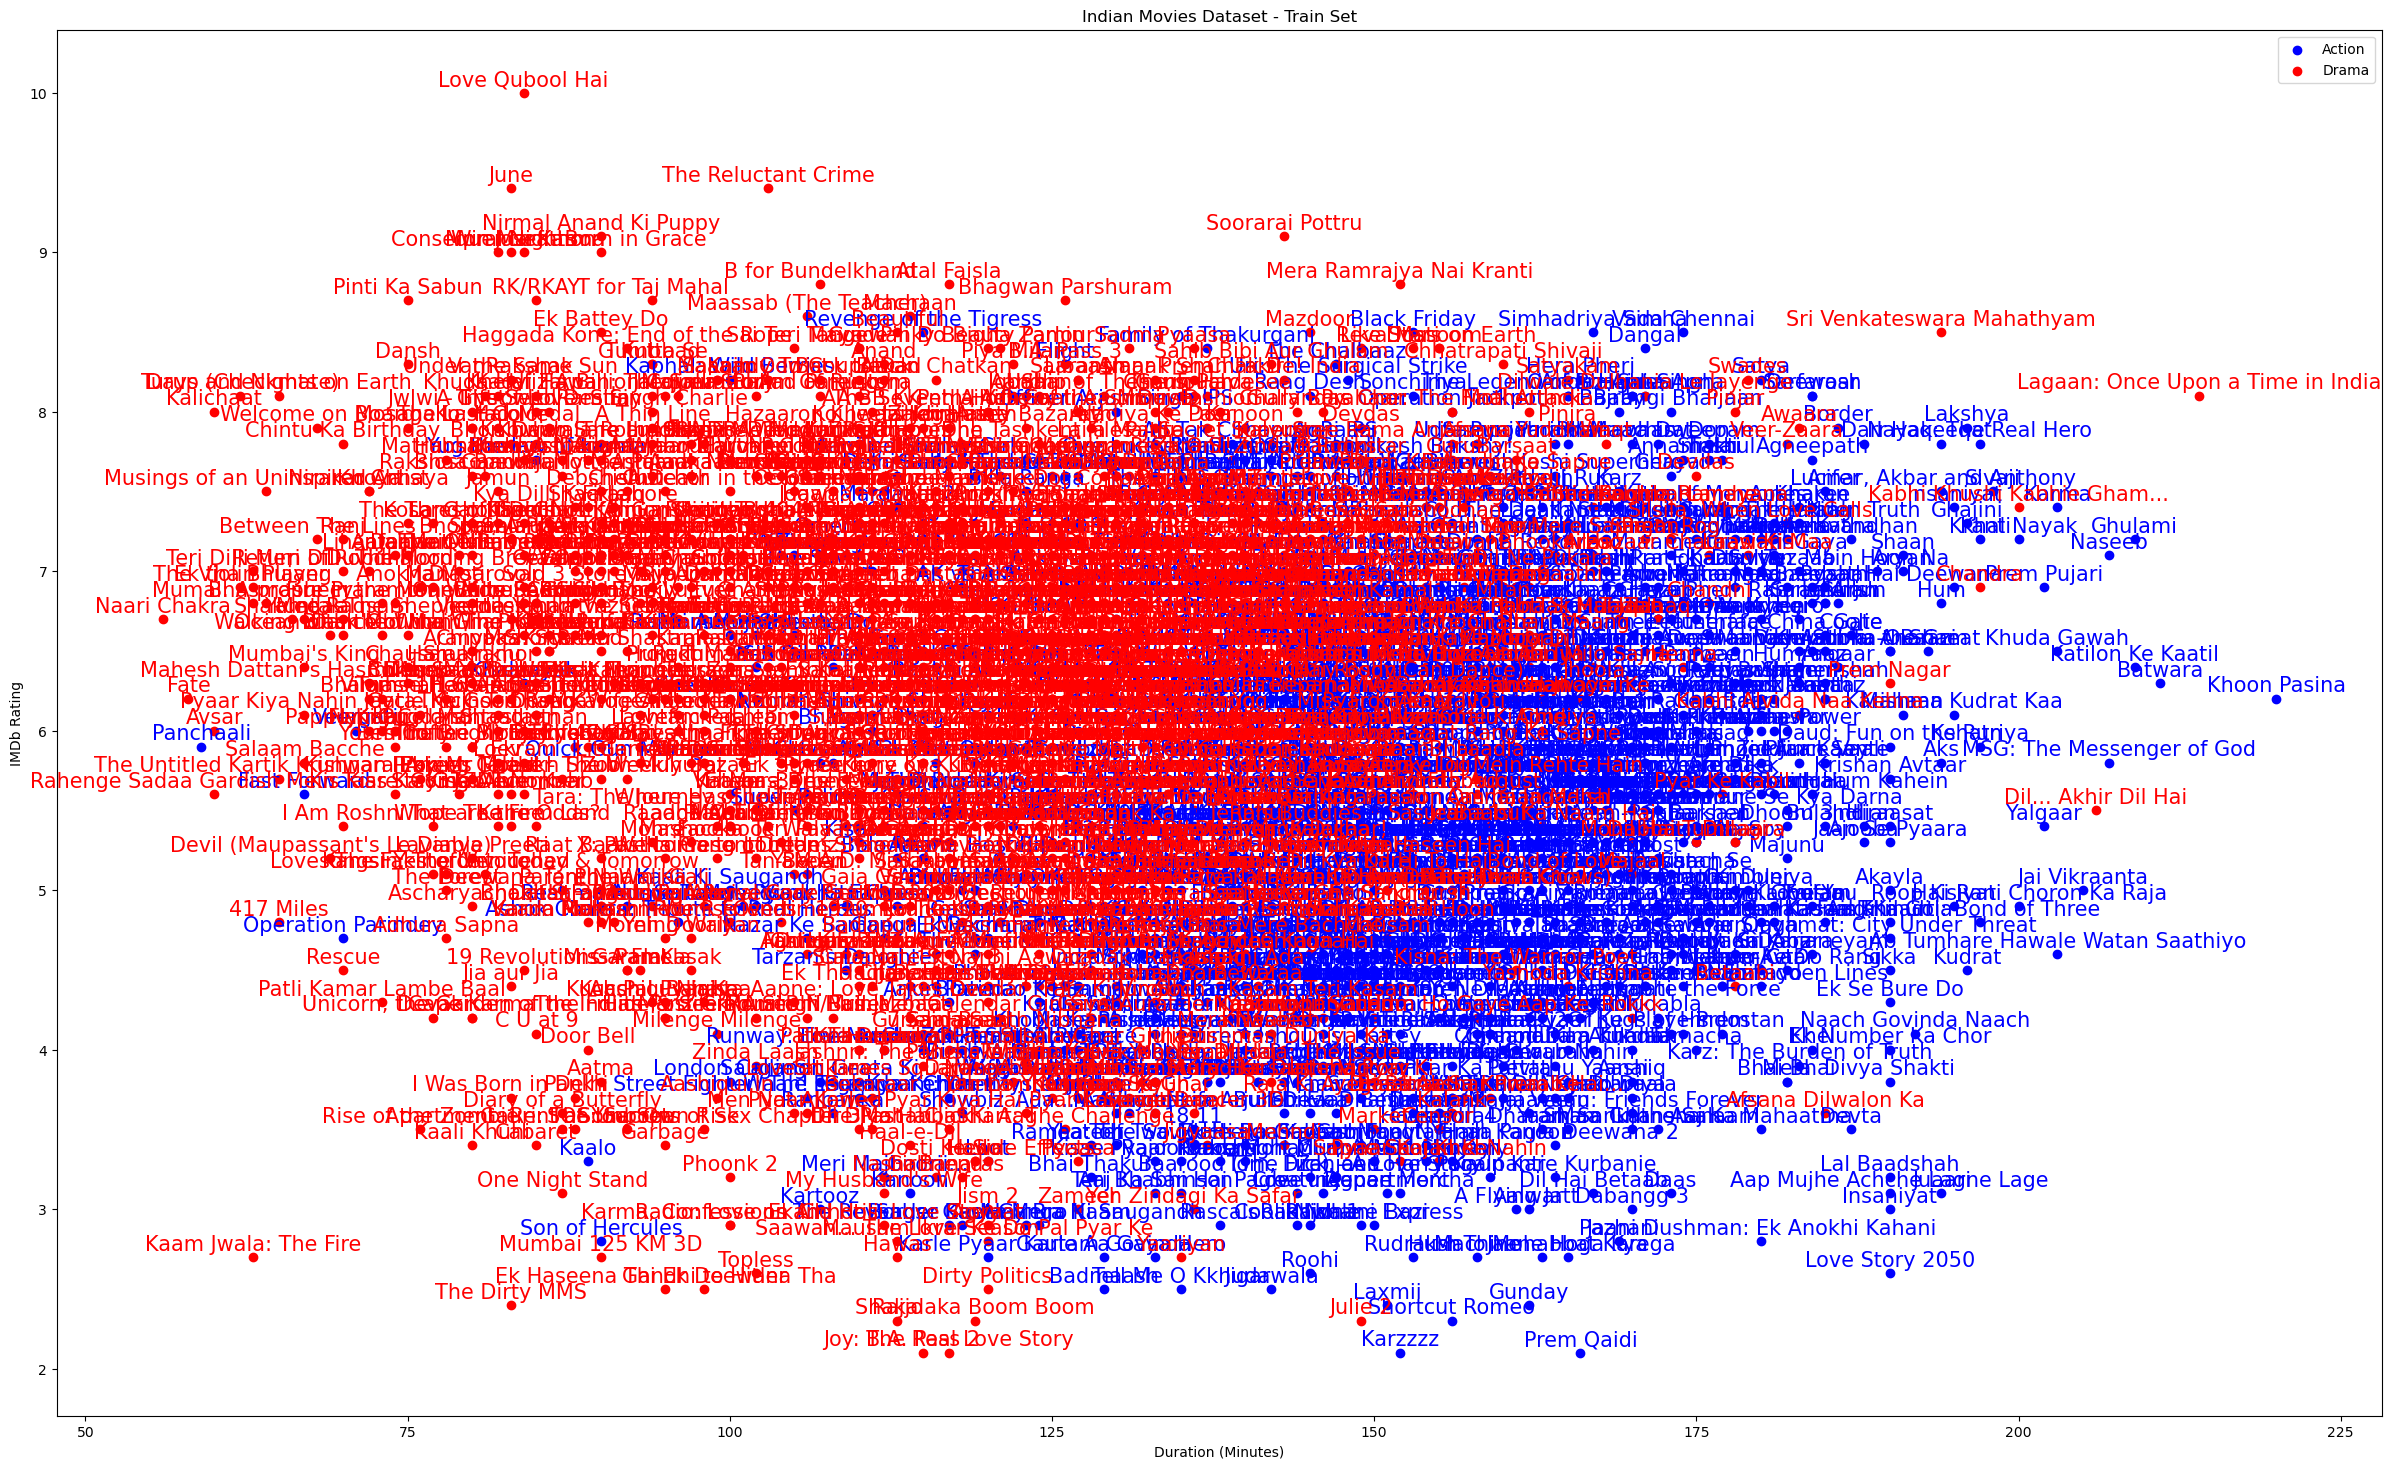

In [14]:
# Plotting the training set with annotations

plt.figure(figsize=(30,18))
colors = {'Action': 'blue', 'Drama': 'red'}
for genre, color in colors.items():
    subset = train_df[train_df['Genre'] == genre]
    plt.scatter(subset['Duration'], subset['Rating'], c=color, label=genre)
    # Annotate each point with movie name
    for _, row in subset.iterrows():
        plt.annotate(row['Name'], (row['Duration'], row['Rating']), textcoords="offset points", xytext=(0,5), ha='center', fontsize=15, color=color)
plt.xlabel('Duration (Minutes)')
plt.ylabel('IMDb Rating')
plt.legend()
plt.title("Indian Movies Dataset - Train Set")
plt.show()

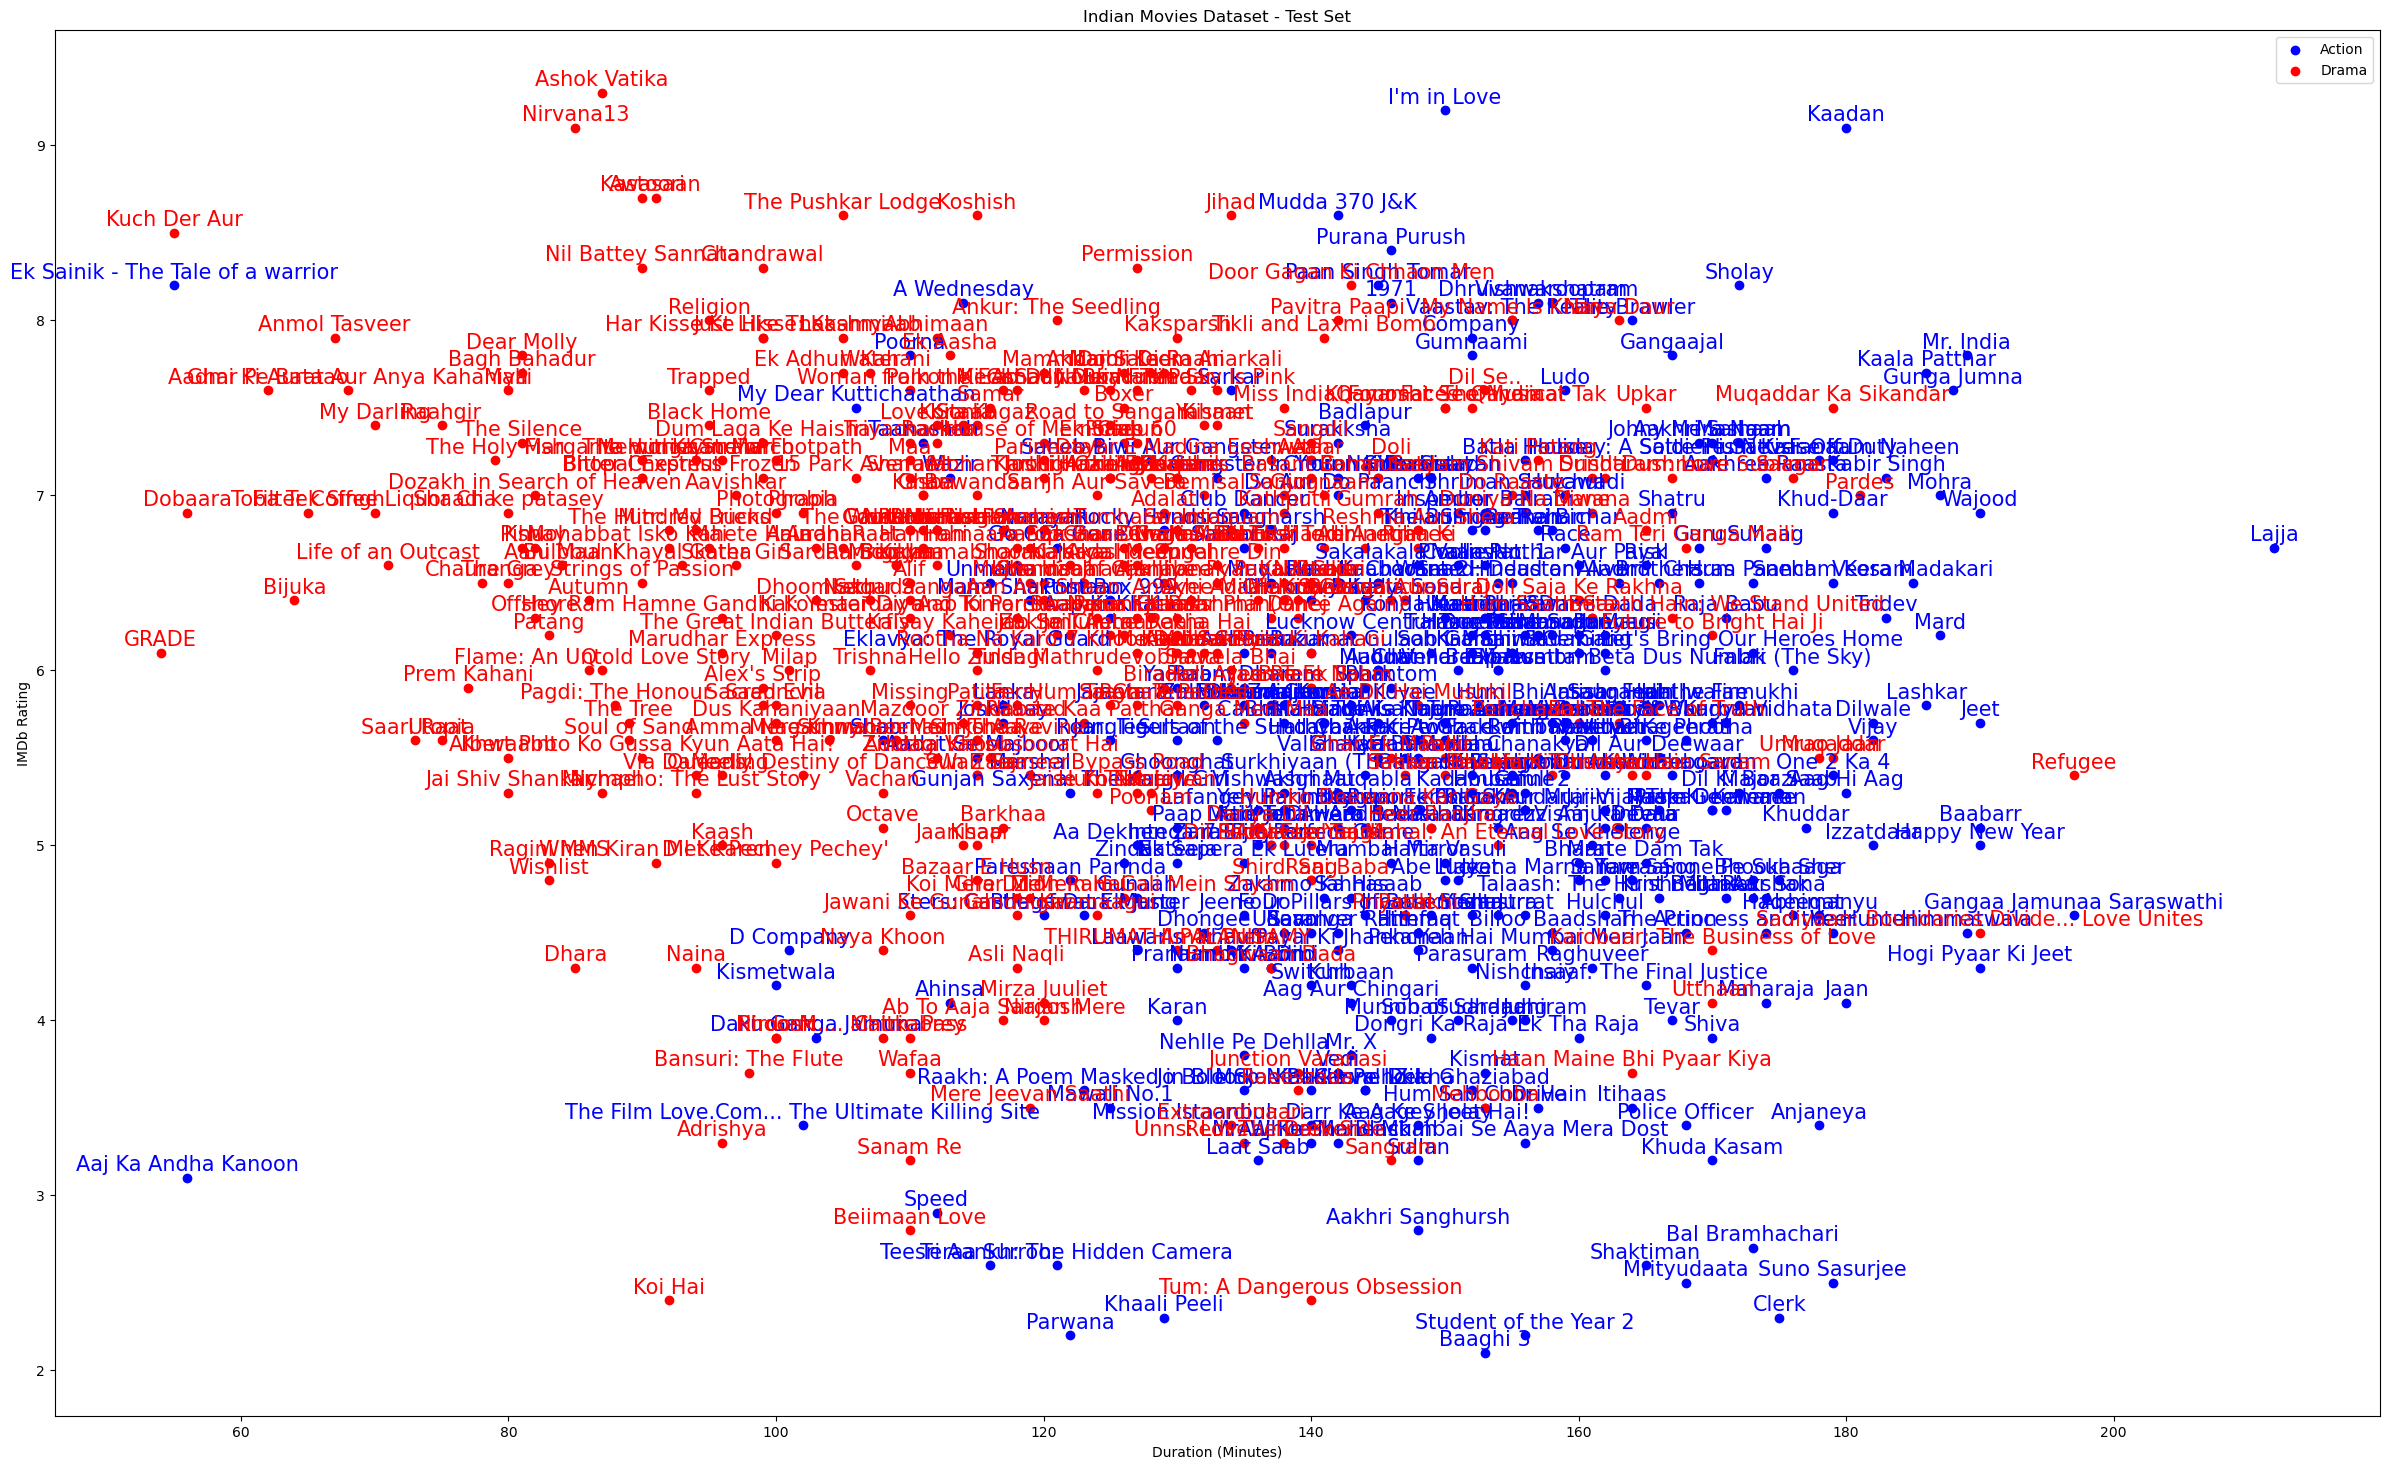

In [15]:
# Plotting the test set with annotations

plt.figure(figsize=(30,18))
colors = {'Action': 'blue', 'Drama': 'red'}
for genre, color in colors.items():
    subset = test_df[test_df['Genre'] == genre]
    plt.scatter(subset['Duration'], subset['Rating'], c=color, label=genre)
    # Annotate each point with movie name
    for _, row in subset.iterrows():
        plt.annotate(row['Name'], (row['Duration'], row['Rating']), textcoords="offset points", xytext=(0,5), ha='center', fontsize=15, color=color)
plt.xlabel('Duration (Minutes)')
plt.ylabel('IMDb Rating')
plt.legend()
plt.title("Indian Movies Dataset - Test Set")
plt.show()

In [21]:
# Preparing data for modelling

X_train = train_df[['Duration', 'Rating']].values
y_train = train_df['Genre'].values
X_test = test_df[['Duration', 'Rating']].values
y_test = test_df['Genre'].values

k_values = list(range(1, 500, 2)) # Generating k values (1,3,5, ..., 499)

accuracies = [] # Empty list to store accuracies of the model

# Training k-NN models and evaluating the accuracies

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = (cm[0,0] + cm[1,1]) / cm.sum()  # Accuracy = (TP + TN) / Total
    accuracies.append(accuracy)

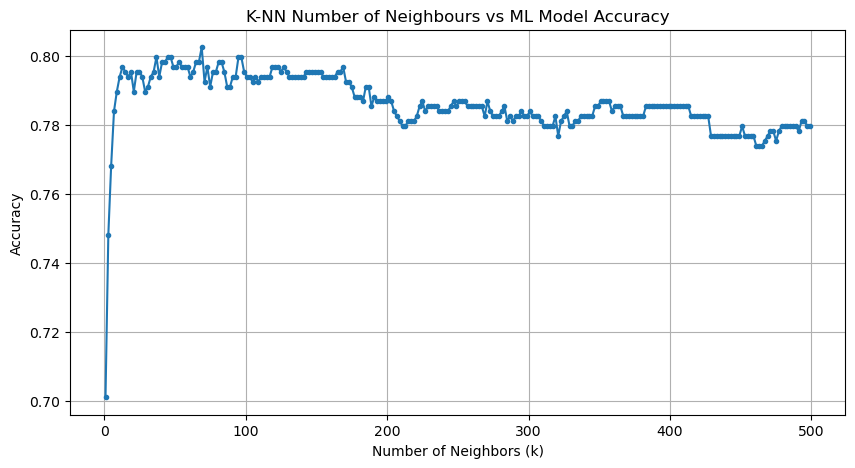

In [18]:
# Plotting accuracy vs k

plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='.')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('K-NN Number of Neighbours vs ML Model Accuracy')
plt.grid(True)
plt.show()

In [ ]:
# Finding optimal k and maximum accuracy

max_accuracy = max(accuracies)
optimal_k = k_values[accuracies.index(max_accuracy)]

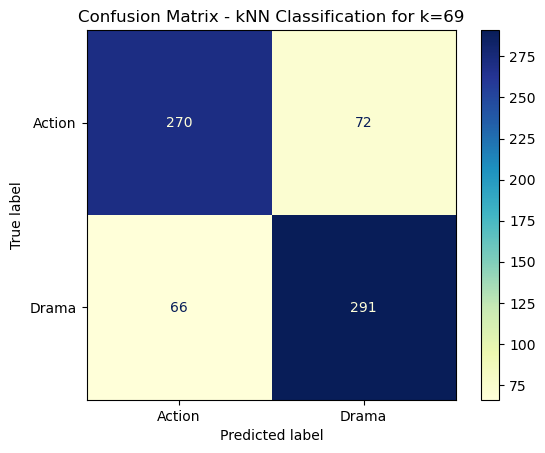

In [26]:
# Displaying confusion matrix for optimal k
model = KNeighborsClassifier(n_neighbors=optimal_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='YlGnBu')
plt.title(f'Confusion Matrix - kNN Classification for k={optimal_k}')
plt.show()

In [27]:
# Calculating performance metrics from the confusion matrix
TP, FN, FP, TN = cm[0,0], cm[0,1], cm[1,0], cm[1,1]

# For Action class
precision_action = TP / (TP + FP)
recall_action = TP / (TP + FN)
f1_action = 2 * (precision_action * recall_action) / (precision_action + recall_action)

# For Drama class
precision_drama = TN / (TN + FN)
recall_drama = TN / (TN + FP)
f1_drama = 2 * (precision_drama * recall_drama) / (precision_drama + recall_drama)

# Overall metrics
overall_precision = (precision_action + precision_drama) / 2
overall_recall = (recall_action + recall_drama) / 2
f_score = (f1_action + f1_drama) / 2

print(f"Optimal k: {optimal_k}")
print(f"Maximum Accuracy: {max_accuracy:.4f}")
print("\nPerformance Metrics:")
print(f"Action - Precision: {precision_action:.4f}, Recall: {recall_action:.4f}, F1: {f1_action:.4f}")
print(f"Drama - Precision: {precision_drama:.4f}, Recall: {recall_drama:.4f}, F1: {f1_drama:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"F-score: {f_score:.4f}")

Optimal k: 69
Maximum Accuracy: 0.8026

Performance Metrics:
Action - Precision: 0.8036, Recall: 0.7895, F1: 0.7965
Drama - Precision: 0.8017, Recall: 0.8151, F1: 0.8083
Overall Precision: 0.8026
Overall Recall: 0.8023
F-score: 0.8024


# Report

### 1. What does the 'k' value in KNN determine?  
Ans. The 'k' value in KNN determine the number of nearest neighbours taken into consideration when doing majority voting in classification or in simple words, classifying a new datapoint.

### 2. How is the optimal 'k' value in KNN typically chosen?  
Ans. The optimal value of 'k' in KNN is chosen via a validation set or cross-validation and selecting the one that maximizes the performance metric like accuracy. For example, in this lab we loop over odd values of k and choose the k with the highest accuracy on the test set.

### 3. How does the value of 'k' affect variance and bias in KNN?  
Ans. A high value of K increases bias (underfitting) while a low value of K increases variance (overfitting). In simple words, a smaller k leads to lower bias because the model closely follows the training data, but it increases variance, making the model sensitive to noise and outliers. In contrast, a larger k smooths the decision boundary, which increases bias but reduces variance by averaging over more neighbors.

### 4. Is KNN sensitive to outliers, and why?  
Ans. Yes, KNN is sensitive to outliers because it classifies a point based on its nearest neighbors. An outlier, if included among these neighbors, would distort the distance measurements affecting neighbour selection.

### 5. How does the scale of features affect the performance of KNN? 
Ans. Since KNN relies on distance calculations, features with larger scales can dominate the distance metric which can lead to biased predictions reducing model effectiveness.